# COMPARING DIFFERENT MACHINE LEARNING MODELS

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
Dataset = pd.read_csv('vgsales.csv')

In [3]:
Dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
Dataset.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
number = LabelEncoder()

Dataset['Platform'] = number.fit_transform(Dataset['Platform'].astype('str'))
Dataset['Genre'] = number.fit_transform(Dataset['Genre'].astype('str'))
Dataset['Publisher'] = number.fit_transform(Dataset['Publisher'].astype('str'))


In [6]:
Dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,26,2009.0,10,359,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,5,1996.0,7,359,11.27,8.89,10.22,1.00,31.37


In [7]:
#extracting the feature vector and the dependant variable vector

columns = ["Platform", "Genre", "Publisher", "NA_Sales", "EU_Sales"]


y = Dataset["Global_Sales"].values
X = Dataset[list(columns)].values


In [8]:
A= Dataset["Genre"].values
A

array([10,  4,  6, ...,  6,  5,  4])

Text(0, 0.5, 'Global_Sales')

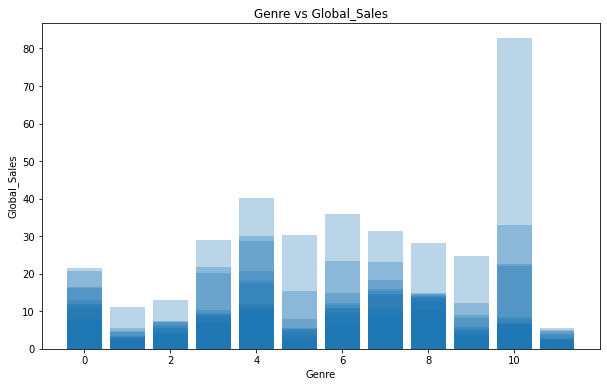

In [22]:
plt.figure(figsize=(10,6))
plt.bar(A, y, alpha=0.3)
plt.title('Genre vs Global_Sales')
plt.xlabel('Genre')
plt.ylabel('Global_Sales')

In [10]:
#importing the linear model library
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [11]:
#importing the train test split library and splitting data into 80% for training 20% for testing
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [12]:
#scaling the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
# apply same transformation to test data
X_test = scaler.transform(X_test)

In [13]:
#fit the train data to the linear model
regr.fit(X_train, y_train)

y_pred_Model1 = regr.predict(X_test)
y_pred_Model1

array([1.30843852e+00, 2.33755583e-01, 2.29793169e-01, ...,
       5.51728809e-01, 1.94051512e-02, 2.85954314e+01])

In [14]:
#Comparing the model predicted results vs the Test set
compare_Model1 = np.concatenate((y_pred_Model1.reshape(len(y_pred_Model1),1), y_test.reshape(len(y_test),1)),1)
compare_Model1

array([[1.30843852e+00, 1.25000000e+00],
       [2.33755583e-01, 3.40000000e-01],
       [2.29793169e-01, 2.70000000e-01],
       ...,
       [5.51728809e-01, 4.80000000e-01],
       [1.94051512e-02, 3.50000000e-01],
       [2.85954314e+01, 2.90200000e+01]])

In [15]:
regr.score(X_train,y_train)

0.9650328265371723

In [16]:
regr.score(X_test,y_test)

0.9657734070600729

In [17]:
#Using DecisionTreeRegressor : 
from sklearn.tree import DecisionTreeRegressor
DTR  = DecisionTreeRegressor()

DTR.fit(X_train, y_train)


DecisionTreeRegressor()

In [18]:
y_pred_Model2 = DTR.predict(X_test)
y_pred_Model2


compare_Model2 = np.concatenate((y_pred_Model2.reshape(len(y_pred_Model2),1), y_test.reshape(len(y_test),1)),1)
compare_Model2


array([[ 1.25,  1.25],
       [ 0.16,  0.34],
       [ 0.17,  0.27],
       ...,
       [ 0.5 ,  0.48],
       [ 0.28,  0.35],
       [33.  , 29.02]])

In [19]:
DTR.score(X_train,y_train)

0.9982093756158373

In [20]:
DTR.score(X_test,y_test)

0.8969494361096205

## INFERENCE
### Score for Linear Regression model =  0.9657734070600729
### Score for Decision Tree Regression model = 0.8969494361096205
### Therfore, for the given dataset Linear Regression model perfoms better.